# using up to date spectrogram func on scipy

In [315]:
# import numpy as np
# from matplotlib import pyplot as plt
# from scipy.io import wavfile
# import scipy.signal as signal


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, welch, butter,sosfiltfilt
from scipy.fft import fftshift
from scipy.io import wavfile
from matplotlib.colors import NoNorm


%matplotlib inline

In [23]:
# Read the wav file (mono)

fs, x = wavfile.read('sample for spectrograms.wav')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# sampling rate: 250Hz ie 250000 samples per sec
fs

250000

In [25]:
# total no. of samples
len(x)

75829490

In [26]:
# len(x)/fs = duration of rec in sec
len(x)/fs

303.31796

In [27]:
# sampling rate per ms: 
250000/1000

250.0

In [28]:
# duration of rec in ms
len(x)/250 

303317.96

In [8]:
# #plt the signal read from wav file
# plt.plot(x)
# plt.xlabel('Sample')
# plt.ylabel('Amplitude')

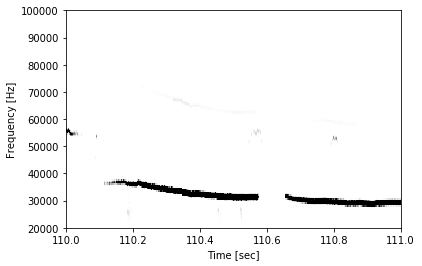

In [9]:
f, t, Sxx = spectrogram(x, fs, nfft=500, noverlap=400, nperseg = 500, window='blackmanharris')
plt.pcolormesh(t, f, Sxx,cmap='gray_r',vmin=0, vmax=255)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(110, 111)
plt.ylim(20000, 100000)
plt.show()

In [10]:
# no norm looks way better 

(110.0, 111.0, 20000.0, 100000.0)

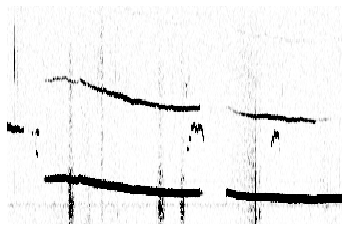

In [11]:
f, t, Sxx = spectrogram(x, fs, nfft=500, noverlap=400, nperseg = 500, window='blackmanharris')
plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(110, 111)
plt.ylim(20000, 100000)
plt.axis('off')

(20000, 100000)

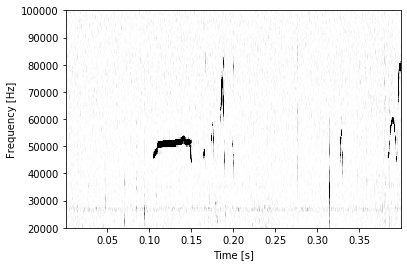

In [31]:
f, t, Sxx = spectrogram(x[35_000_000:35_100_000], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
#plt.xlim(110, 111)
plt.ylim(20000, 100000)
#plt.axis('off')

(20000, 100000)

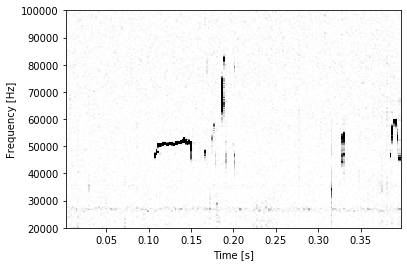

In [32]:
f, t, Sxx = spectrogram(x[35_000_000:35_100_000], fs, nfft=1024, noverlap=512, nperseg = 1024, window='blackmanharris')
plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
#plt.xlim(110, 111)
plt.ylim(20000, 100000)
#plt.axis('off')

In [33]:
x.shape

(75829490,)

In [34]:
# time to play with real file for analysis 

In [109]:
fs, x = wavfile.read('ch1_T0000001.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [110]:
fs

250000

In [111]:
len(x)

224278521

In [112]:
x.shape

(224278521,)

In [113]:
len(x)/fs

897.114084

In [188]:
rec_start = 1381582.903

In [189]:
rec_end = 2281328.511

In [190]:
rec_end - rec_start # to cross check 

899745.608

In [191]:
# rec 71001 call 6 is a trill 88 ms long
call_start = 1696140.03

In [192]:
call_start - rec_start # give time of call start in ms

314557.1270000001

In [193]:
spec_begin= (call_start - rec_start) * 250 # gives call start in sample no. ie spec_begin
spec_begin

78639281.75000003

In [197]:
int(spec_begin)

78639281

In [194]:
250*100 # addition of 100 ms window 

25000

In [195]:
spec_end = spec_begin + 25000
spec_end

78664281.75000003

In [198]:
int(spec_end)

78664281

(20000, 100000)

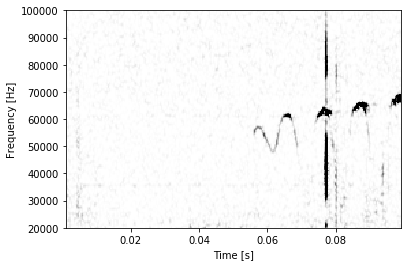

In [196]:
f, t, Sxx = spectrogram(x[int(spec_begin):int(spec_end)], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
#plt.xlim(110, 111)
plt.ylim(20000, 100000)
#plt.axis('off')

In [123]:
# lets try n generalize this code, write a func where you give call start and it outputs a spectrogram
# hardcoding rec71001 rec_start for starters

In [137]:
def gen_spec(call_start:int):
    rec_start = 1381582.903
    spec_begin = (call_start - rec_start) * 250
    spec_end = spec_begin + 50000
    f, t, Sxx = spectrogram(x[int(spec_begin):int(spec_end)], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
    plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    #plt.xlim(110, 111)
    plt.ylim(20000, 100000)
    #plt.axis('off')       

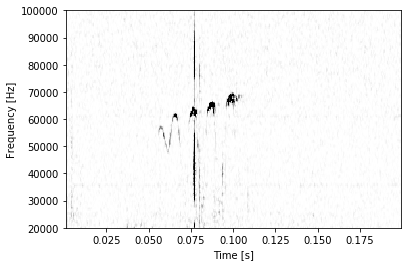

In [138]:
gen_spec(1696140.03) # this is call 18 on channel 1, calls appear rightward shifted, lets check other channnels

In [139]:
fs, x = wavfile.read('ch2_T0000001.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [140]:
def gen_spec(call_start:int):
    rec_start = 1381582.903
    spec_begin = (call_start - rec_start) * 250
    spec_end = spec_begin + 50000
    f, t, Sxx = spectrogram(x[int(spec_begin):int(spec_end)], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
    plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    #plt.xlim(110, 111)
    plt.ylim(20000, 100000)
    #plt.axis('off')       

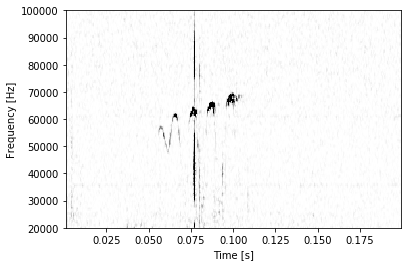

In [141]:
gen_spec(1696140.03) # this is call 18 on channel 1, calls appear rightward shifted, lets check other channnels

In [181]:
fs, x = wavfile.read('ch2_T0000001.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [182]:
def gen_spec(call_start:int):
    rec_start = 1381582.903
    spec_begin = (call_start - rec_start) * 250
    spec_end = spec_begin + 50000
    f, t, Sxx = spectrogram(x[int(spec_begin):int(spec_end)], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
    plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    #plt.xlim(110, 111)
    plt.ylim(20000, 100000)
    #plt.axis('off')       

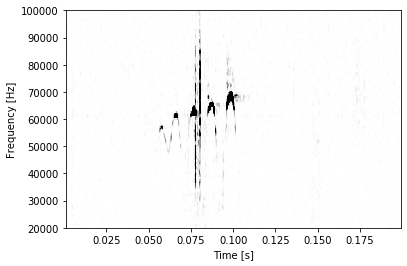

In [183]:
gen_spec(1696140.03) # this is call 18 on channel 1, calls appear rightward shifted, lets check other channnels

In [145]:
fs, x = wavfile.read('ch4_T0000001.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [146]:
def gen_spec(call_start:int):
    rec_start = 1381582.903
    spec_begin = (call_start - rec_start) * 250
    spec_end = spec_begin + 50000
    f, t, Sxx = spectrogram(x[int(spec_begin):int(spec_end)], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
    plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    #plt.xlim(110, 111)
    plt.ylim(20000, 100000)
    #plt.axis('off')       

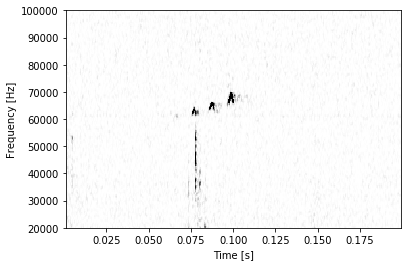

In [147]:
gen_spec(1696140.03) # this is call 18 on channel 1, calls appear rightward shifted, lets check other channnels

In [ ]:
# computing power spectral density: using Welch's method https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

In [256]:
fs, x = wavfile.read('ch4_T0000001.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [257]:
f, Pxx = welch(x[78639281:78689281], fs, window='blackmanharris', nperseg=500, noverlap=400, nfft=500)

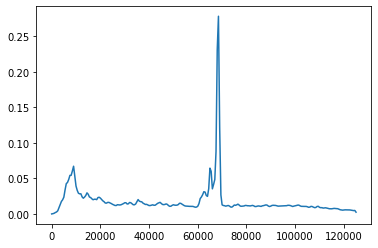

In [258]:
plt.plot(f, Pxx)

In [259]:
Pxx.max() # max PSD

0.27781442

In [260]:
Pxx.min() # min PSD

0.00026295212

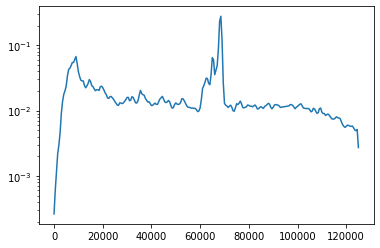

In [261]:
plt.semilogy(f, Pxx) # freq on x, PSD on y

(20000, 100000)

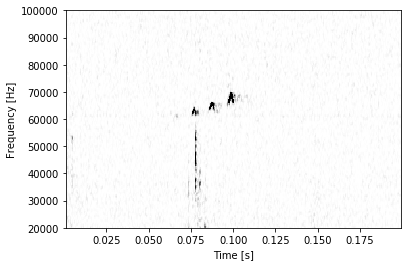

In [269]:
f, t, Sxx = spectrogram(x[78639281:78689281], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
#plt.xlim(110, 111)
plt.ylim(20000, 100000)
#plt.axis('off')

In [274]:
# 4th order Butterworth high pass filtering to remove frequencies below 20 kHz

In [300]:
fs, x = wavfile.read('ch4_T0000001.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [312]:
sos = butter(4, (20000,120000), btype='bandpass', output='sos',fs=fs)

In [316]:
x_filt = sosfiltfilt(sos, x)

Text(0.5, 0, 'Time [s]')

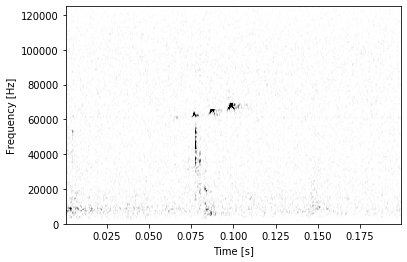

In [317]:
f, t, Sxx = spectrogram(x[78639281:78689281], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

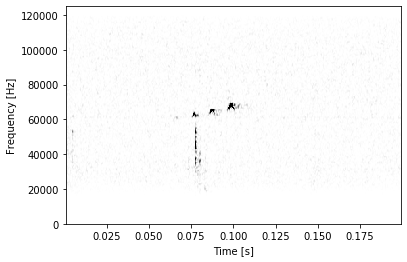

In [318]:
f, t, Sxx = spectrogram(x_filt[78639281:78689281], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')